## Titanic Exploratory Data Analysis 

The Titanic dataset is a compelling collection of information, capturing the details of passengers onboard the ill-fated RMS Titanic, which sank on its maiden voyage in 1912 after colliding with an iceberg. The dataset provides a mix of numerical, categorical, and textual data, offering insights into aspects like socio-economic status, age, gender, and survival, among others.

The primary aim of this exploratory data analysis is to uncover patterns, correlations, and insights from the data. I will seek to answer questions such as:

- What factors contributed most to survival?
- Were passengers of higher socio-economic status more likely to survive?
- How did age and gender play a role in survival rates?

In this EDA, we will employ various data visualization techniques and statistical methods to:

Understand the data's underlying structure.
1. Identify any missing values and anomalies.
2. Understand the distribution of key variables.
3. Investigate relationships and correlations between variables.

By the end of this analysis, we aim to have a comprehensive understanding of the dataset and the stories hidden within, paving the way for potential predictive modeling in subsequent phases.

#### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
# Loading the data
titanic_data = pd.read_csv("/Users/sara/MDS-CL/Github_update/data/titanic.csv")

#### Preliminary Data Analysis

In [4]:
titanic_data.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [5]:
titanic_data.tail()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
886,male,27.0,0,0,13.00,S,Second,man,True,0
887,female,19.0,0,0,30.00,S,First,woman,True,1
888,female,NaN,1,2,23.45,S,Third,woman,False,0
889,male,26.0,0,0,30.00,C,First,man,True,1
890,male,32.0,0,0,7.75,Q,Third,man,True,0


In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


#### Data Cleaning

In [7]:
# Filling Null values for 'age" column
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)

# Renaming Columns to avoid confusion
titanic_data = titanic_data.rename(columns={'who': 'life_stage'})


titanic_data

,sex,age,sibsp,parch,fare,embarked,class,life_stage,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,28.0,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


#### Data Visualization

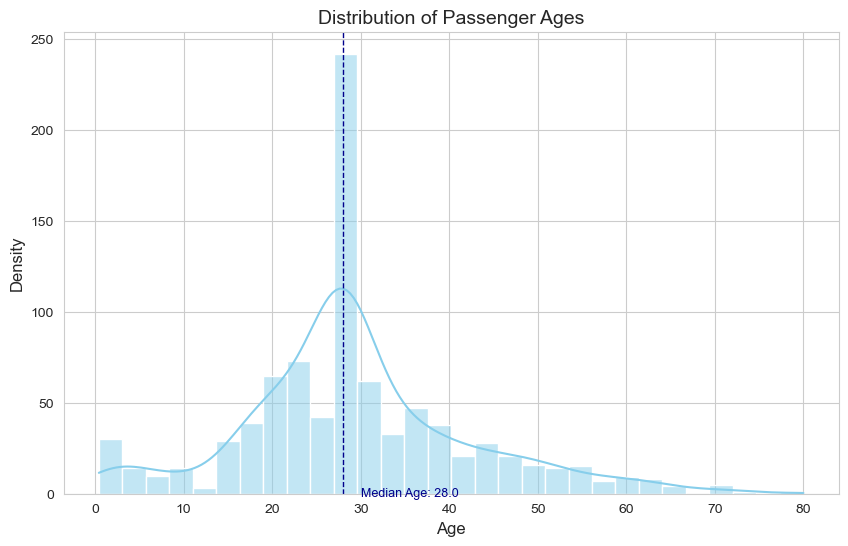

In [10]:
# Destribution of Passenger Ages
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(titanic_data["age"], color='skyblue', kde=True, bins=30)

# Add vertical line for the median age
median_age = titanic_data["age"].median()
plt.axvline(median_age, color='darkblue', linestyle='--', linewidth=1)
plt.text(median_age+2, 0.03, f'Median Age: {median_age}', fontsize=9, verticalalignment='center', color='darkblue')

# Displaying the title and labels
plt.title("Distribution of Passenger Ages", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()


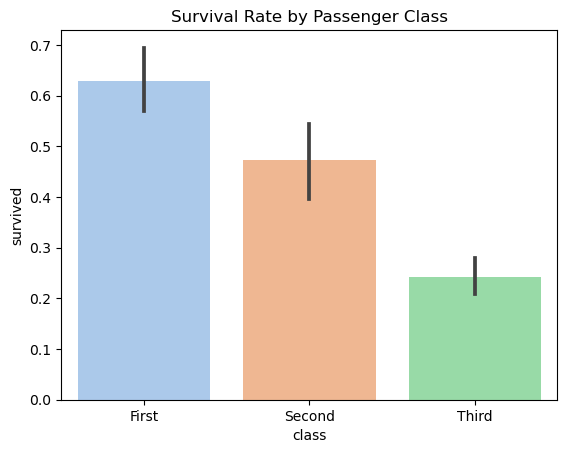

In [8]:
# Survival raye by Passenger Class
sns.barplot(x="class", y="survived", data= titanic_data, palette="pastel", order=['First', 'Second', 'Third'])

# Displaying the title and labels
plt.title("Survival Rate by Passenger Class")

plt.show()

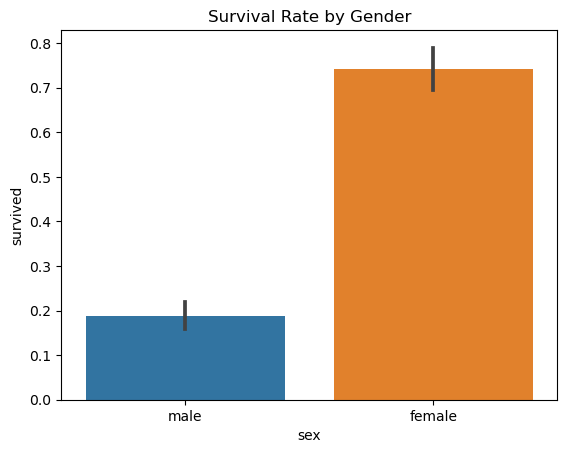

In [9]:
# Survival rate by Gender

sns.barplot(x='sex', y='survived', data=titanic_data)

plt.title('Survival Rate by Gender')
plt.show()

In [10]:
titanic_class = pd.get_dummies(titanic_data, columns=['class'], drop_first=False)

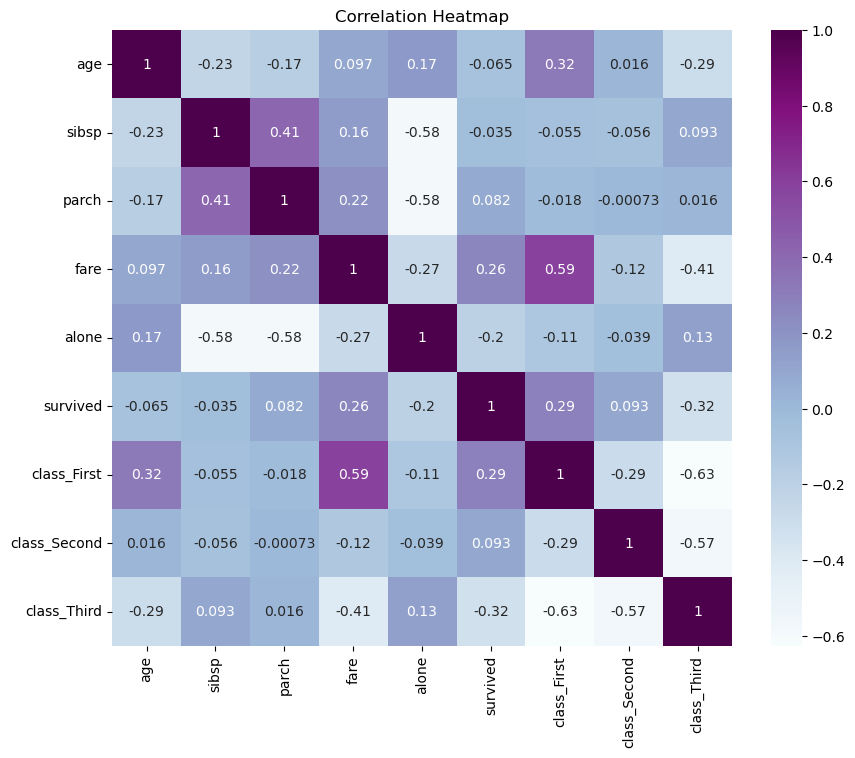

In [11]:
# Finding Correlations with a Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = titanic_class.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.title('Correlation Heatmap')
plt.show()

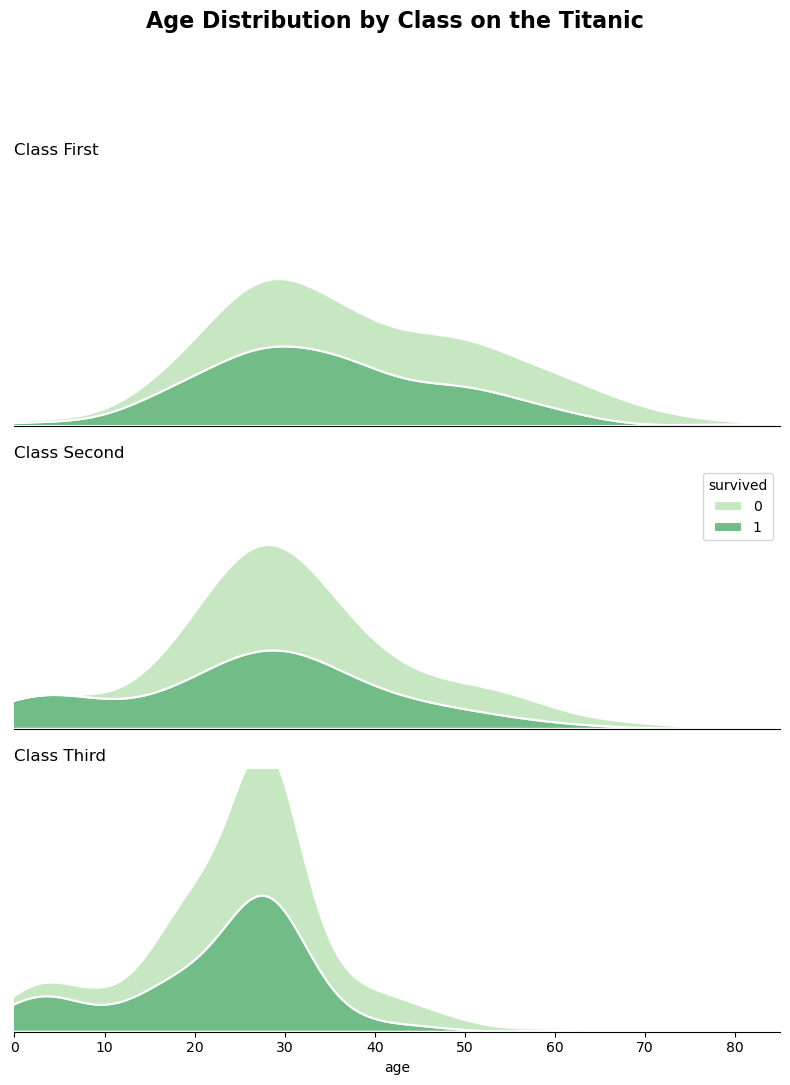

In [53]:
# Age Distribution by Class 

### Adapted from SUBIN AN's work at https://www.kaggle.com/code/subinium/awesome-visualization-with-titanic-dataset
# Modifications made to fit the current dataset and context.


def plot_dist(data):
    fig, axarr = plt.subplots(3, 1, figsize=(8, 10), sharex=True)
    fig.subplots_adjust(hspace=-0.6)

    classes = sorted(data["class"].unique())
    palette_colors = ["#fd4659", "#ffc5cb", "#fd798f"]

    # Loop over each class for plotting 
    for i, (cls, color) in enumerate(zip(classes, palette_colors)):
        subset = data[data["class"] == cls]
        sns.kdeplot(data=subset, x='age', hue='survived', ax=axarr[i],
                    fill=True, common_norm=False, palette='Greens', alpha=0.7,
                    linewidth=1.5, edgecolor='white', multiple="stack")
        
        axarr[i].set_title(f'Class {cls}', loc='left', fontdict={'fontsize': 12, 'fontweight': 'light'})
        axarr[i].set_ylim(0, 0.1)
        axarr[i].set_xlim(0, 85)
        axarr[i].yaxis.set_visible(False)
        
        if i != 2:  # Only show x-axis for the last plot
            axarr[i].xaxis.set_visible(False)
        
        axarr[i].spines['right'].set_visible(False)
        axarr[i].spines['top'].set_visible(False)
        axarr[i].spines['left'].set_visible(False)
        
        if i != 1:  # Only show legend for the middle plot for visual balance
            axarr[i].get_legend().remove()

    # Set the main title
    fig.suptitle('Age Distribution by Class on the Titanic', fontsize=16, fontweight='bold', y=1.08)
    plt.tight_layout()
    plt.show()

# Call the function
plot_dist(titanic_data)


#### Hypothesis Testing 
Hypothesis: First-class passengers had a higher survival rate than third-class passengers.

To investigate the relationship between passenger class and survival rate, a Chi-squared test was conducted using a contingency table that cross-tabulated the number of survivors against passenger class.

In [12]:
# Create a contingency table for Class and Survival
contingency_table = pd.crosstab(titanic_data['class'], titanic_data['survived'])

# Display the contingency table
print(contingency_table)

# Perform the Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(p)

# Check the p-value
if p < 0.05:
    print("There is a significant relationship between class and survival.")
else:
    print("There is no significant relationship between class and survival.")


survived    0    1
class             
First      80  136
Second     97   87
Third     372  119
4.549251711298793e-23
There is a significant relationship between class and survival.


From the Chi-squared test, we obtained a p-value which is extremely close to zero (p = 4.55e-23). This indicates a very strong statistical significance.

There is a highly significant relationship between the class of a passenger and their chances of survival on the Titanic. Our hypothesis that first-class passengers had a higher survival rate than third-class passengers is overwhelmingly supported by the data.